In [1]:
import pandas as pd
import glob

path = r'D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex'
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    print(f'Reading {filename}')
    df = pd.read_csv(filename, index_col=None, header=0, parse_dates=True)
    df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=False)
print(f'Read {frame.size} rows.')

Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2005-31.12.2005.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2006-31.12.2006.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2007-31.12.2007.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2008-31.12.2008.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2009-31.12.2009.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2010-31.12.2010.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2011-31.12.2011.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2012-31.12.2012.csv
Reading D:\Code\cs-lib-bitcoin-p

In [262]:
from datetime import datetime, timedelta

prices = frame.set_index('Gmt time')
prices = prices['High'].resample('1d').mean()
resolution = timedelta(days=1)

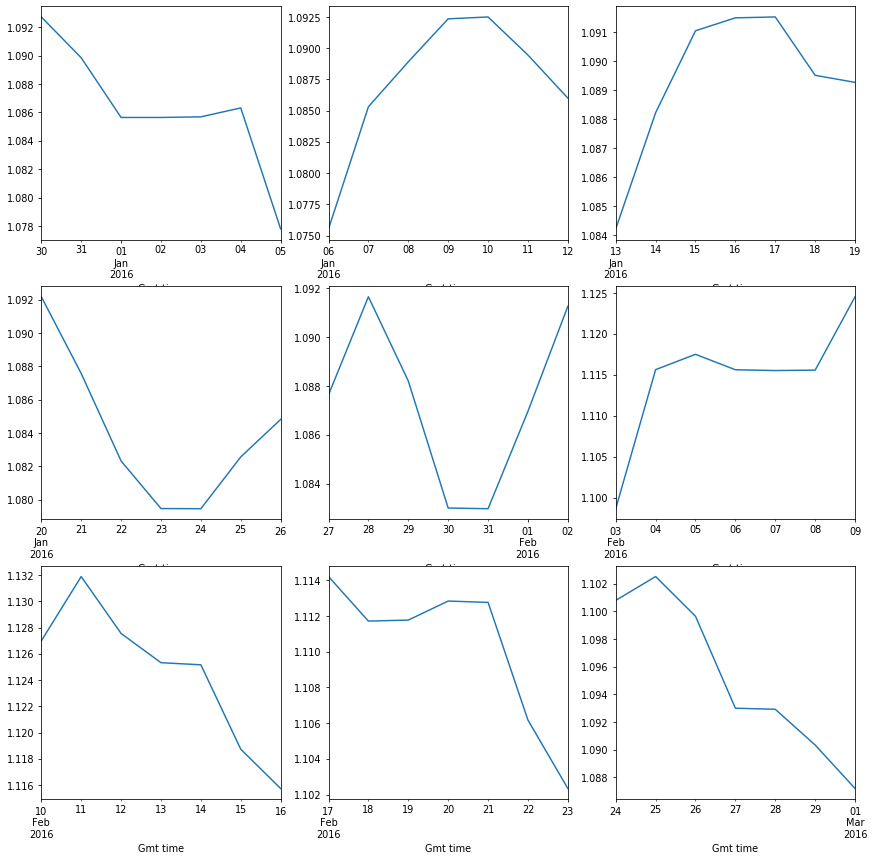

In [263]:
"""Following code shows missing data points during or around weekends.""" 

import matplotlib.pyplot as plt

start = datetime(2016, 1, 1)
saturdays = [start + timedelta(days=d) for d in range(0, 365)]
saturdays = [d for d in saturdays if d.weekday() == 5]

ROWS = 3
COLS = 3

fig = plt.figure(figsize=(COLS * 5, ROWS * 5), dpi=70)
for i, w in enumerate(saturdays):
    if i >= ROWS * COLS:
        break
    f = w - resolution * 3
    t = w + resolution * 3     
    axes = fig.add_subplot(ROWS, COLS, i + 1)
    display = prices[f : t]
    display.plot(ax = axes)  

[=========================================================== ] 978/980

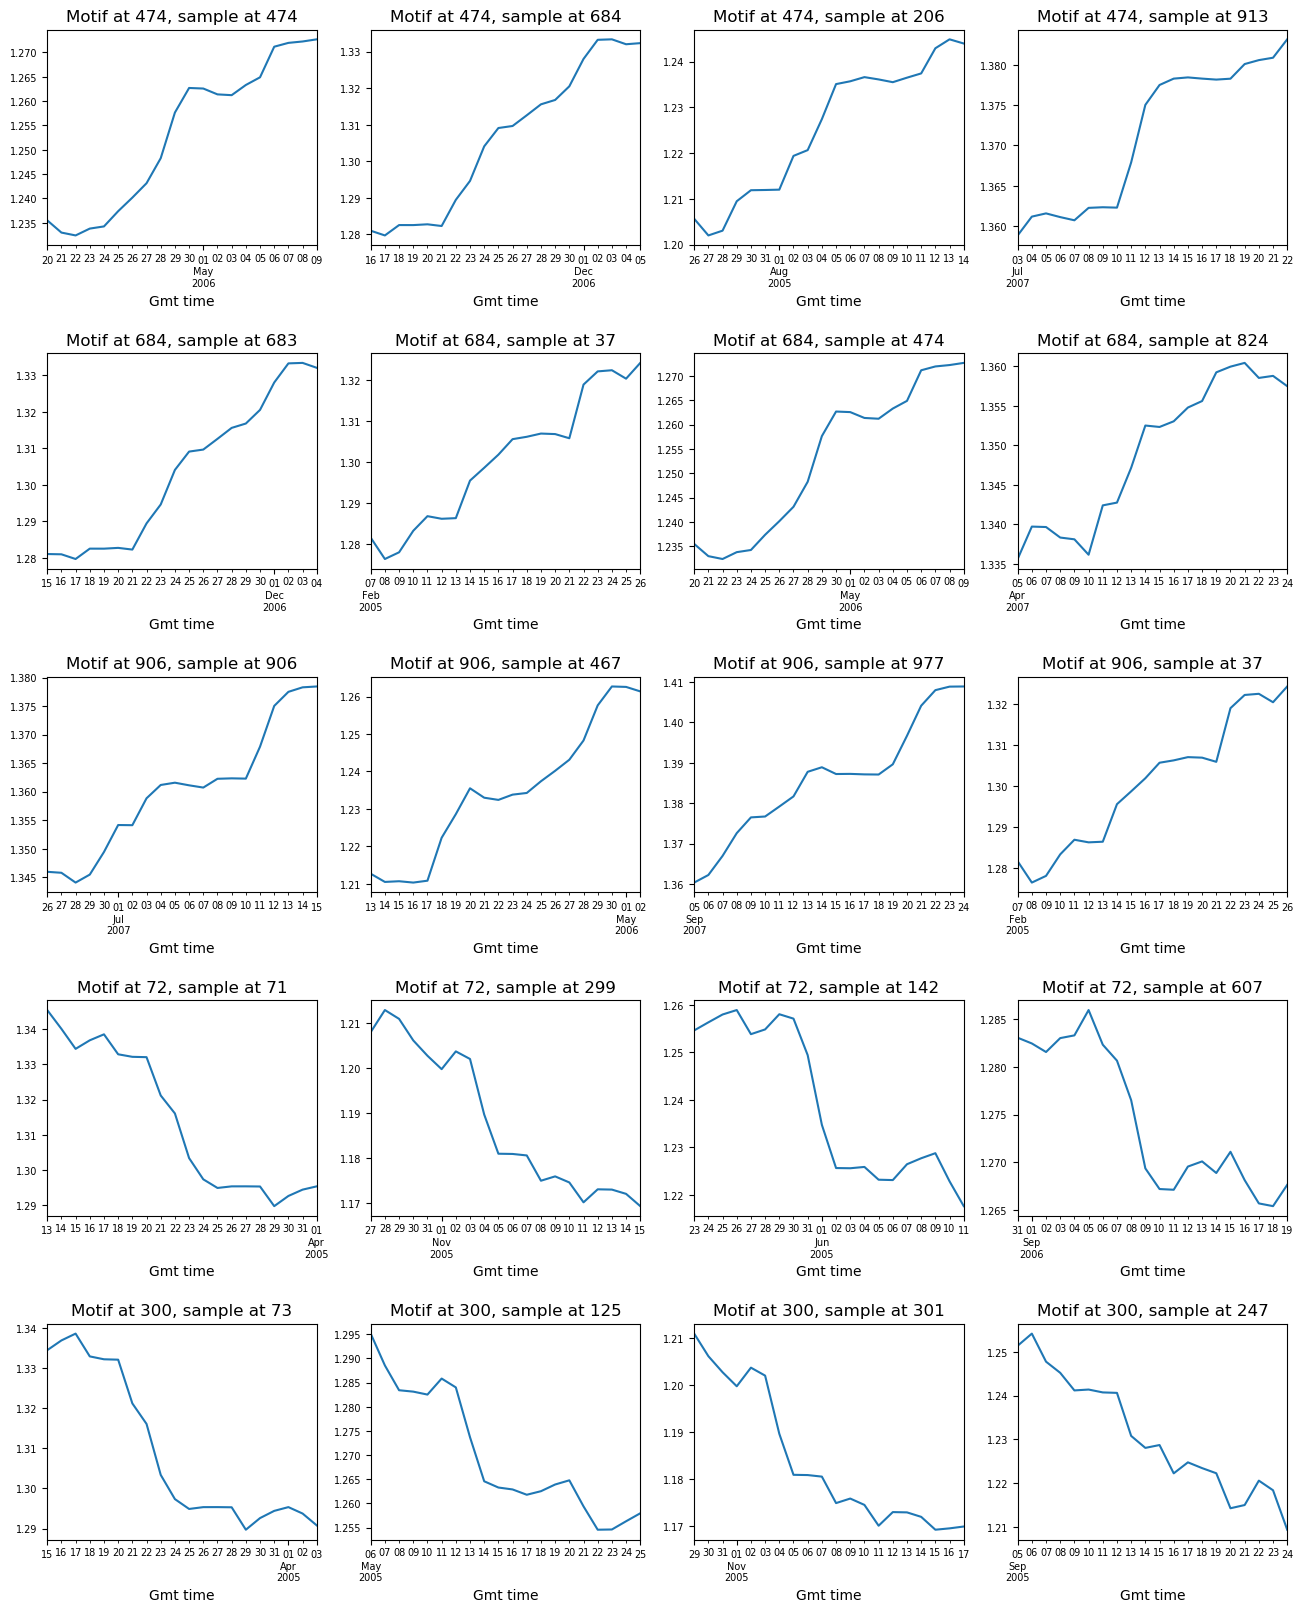

In [273]:
# file:///D:/Dropbox/Books/WORK/DS/100_Time_Series_Data_Mining_Questions__with_Answers.pdf
# https://github.com/matrix-profile-foundation/mass-ts
!pip install mass-ts

import mass_ts as mts
import numpy as np
import random
from IPython.display import ProgressBar

subset = prices.iloc[0:1000]


def top_k_motifs_ordered(distances, k, exclusion_zone):
    distances = np.asarray(distances)
    # get top motifs for this query (will not be sorted)
    top = mts.top_k_motifs(distances, k, exclusion_zone)
    top = np.asarray(top)
    # sort best motifs
    top_x = distances[top].argsort()
    return top[top_x]


query_indices = []
query_motifs = []
query_motif_fitness = []

bar = ProgressBar(len(subset) - query_length)
bar.display()

for query_length in [20]:
    
    for query_start in range(0, len(subset) - query_length, 6):
        query = subset[query_start:query_start + query_length]
        distances = mts.mass2(subset.values, query.values)
        distances = np.absolute(distances)
        
        # save query start
        query_indices.append(query_start)
        
        top = top_k_motifs_ordered(distances, 4, query_length)
        query_motifs.append(top)
        
        # get fitness for this motif-set
        fitness = 1.0 / np.count_nonzero(distances < 1)
        query_motif_fitness.append(fitness)
        
        bar.progress = query_start
        bar.update()
        
    ROWS = 5
    COLS = 4
    
    top_queries = top_k_motifs_ordered(query_motif_fitness, ROWS, query_length)
    query_motifs = np.asarray(query_motifs)[top_queries]
    query_indices = np.asarray(query_indices)[top_queries]
    query_motif_fitness = np.asarray(query_motif_fitness)[top_queries]
            
    fig, axes = plt.subplots(ROWS, COLS, sharex=False, figsize=(COLS * 4, ROWS * 4), dpi = 100)
    plt.subplots_adjust(hspace=0.5)
    
    for ai, mi in enumerate(query_indices):
        for aj, mj in enumerate(query_motifs[ai]):
            match = subset.iloc[mj:mj + query_length]
            ax = axes[ai, aj]
            match.plot(ax = ax)
            ax.set_title(f'Motif at {mi}, sample at {mj}')
            ax.tick_params('both', which='both', labelsize=7)